In [2]:
#importing libraries
import pandas as pd
import numpy as np

#for removing ignore warnings
import warnings
warnings.filterwarnings("ignore")

#For date time conversions
import datetime

In [3]:
#matplotlib graphs includes in the notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#Seaborn for beautiful graphs
import seaborn; seaborn.set()
seaborn.set(font_scale=1.15,style="whitegrid")

In [4]:
#Reading excel into dataframe named df, setting index column to date, import dates in datetime format and mask no data values 
df = pd.read_csv('dateTime_kwh2001_3103.csv', index_col='date time', parse_dates=True, na_values=['0'])

# Remove missing values.
df.dropna()

# Print a concise summary of a DataFrame
df.info()

# Generate descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 592160 entries, 2020-01-20 00:00:01 to 2020-03-31 23:59:55
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   kwh     592160 non-null  float64
dtypes: float64(1)
memory usage: 9.0 MB


,kwh
count,592160.000000
mean,0.000526
std,0.000693
min,0.000100
25%,0.000200
50%,0.000400
75%,0.000600
max,0.010300


In [5]:
# Display first n values
df.head(5)

,kwh
date time,
2020-01-20 00:00:01,0.0002
2020-01-20 00:00:11,0.0002
2020-01-20 00:00:21,0.0002
2020-01-20 00:00:31,0.0002
2020-01-20 00:00:41,0.0002


In [6]:
# To rename axis
df.rename_axis('date', inplace=True)

In [7]:
# Resampling data frame for per min data frequency
df = df.resample('D').sum()

# Removing data values from dataframe
df.drop(df[df.kwh < 2].index, inplace=True)
df.drop(df[df.kwh > 7].index, inplace=True)

In [8]:
# Display all values
df

,kwh
date,
2020-01-20,3.8529
2020-01-21,4.6259
2020-01-22,3.9684
2020-01-23,4.2741
2020-01-24,5.1785
...,...
2020-03-27,3.9272
2020-03-28,4.5493
2020-03-29,3.5194


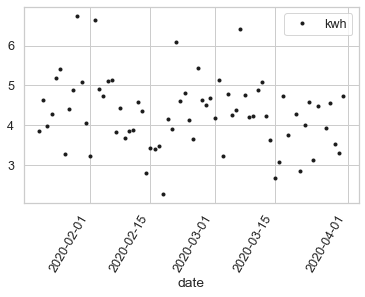

In [9]:
df.plot(grid = True, style = 'k.', rot = 60);

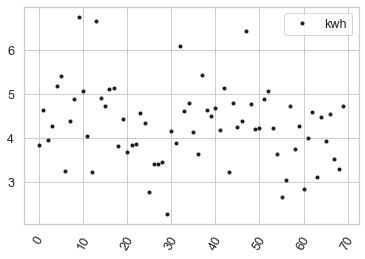

In [10]:
#Create a new CSV file, copy data, read data, plot data
df.to_csv('tempA.csv')
from matplotlib import pyplot
features = pd.read_csv('tempA.csv', header=0)
features.plot(style='k.',rot = 60,grid = True)
pyplot.show()

In [11]:
features.reset_index(inplace=True)
features.head()

,index,date,kwh
0,0,2020-01-20,3.8529
1,1,2020-01-21,4.6259
2,2,2020-01-22,3.9684
3,3,2020-01-23,4.2741
4,4,2020-01-24,5.1785


In [12]:
#Adding new FEATURES year, month and day
features['year'] = pd.to_datetime(features['date']).dt.year
features['month'] = pd.to_datetime(features['date']).dt.month
features['day'] = pd.to_datetime(features['date']).dt.day

#Dropping date column
features.drop('date',axis = 1, inplace = True)

#Changing column positions
features = features[['year','month','day','kwh']]

In [13]:
features.head()

,year,month,day,kwh
0,2020,1,20,3.8529
1,2020,1,21,4.6259
2,2020,1,22,3.9684
3,2020,1,23,4.2741
4,2020,1,24,5.1785


In [14]:
# Labels are the values (energy usage) we want to predict
labels = np.array(features['kwh'])

# Remove the labels from the database
features.drop('kwh', axis = 1, inplace = True)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [16]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [17]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (56, 3)
Training Labels Shape: (56,)
Testing Features Shape: (14, 3)
Testing Labels Shape: (14,)


In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 128 decision trees
rf = RandomForestRegressor(n_estimators = 1000)

# Train the model on training data
rf.fit(train_features, train_labels);

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.97 degrees.


In [20]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.41 %.


In [21]:
a = np.array([2020,1,24])
rf.predict(a.reshape(1,3))

array([4.0180946])

In [22]:
datetemp

NameError: name 'datetemp' is not defined

In [23]:
pred_date = '2020-03-28'

In [24]:
user_date = datetime.strptime(pred_date,'%Y-%m-%d').date()

AttributeError: module 'datetime' has no attribute 'strptime'

In [25]:
datetemp[datetemp['date'] == user_date]

NameError: name 'datetemp' is not defined

In [26]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Convert to png using system command (requires Graphviz)

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.84
Variable: month                Importance: 0.16
Variable: year                 Importance: 0.0


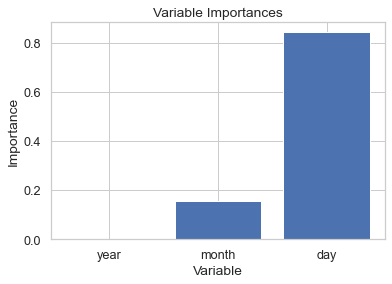

In [28]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
# Set the style
#plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances)

# Tick labels for x axis
plt.xticks(x_values, feature_list)

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

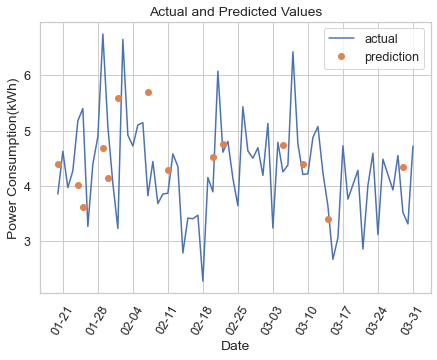

In [31]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of training values
years = features[:, feature_list.index('year')]
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
years = test_features[:, feature_list.index('year')]
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]

# List Column of dates and then convert to datetime object
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'],'o', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Power Consumption(kWh)'); plt.title('Actual and Predicted Values');


# Define the date format
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))


In [235]:
# Step 3: Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(train_features, train_labels)
labels_pred = clf.predict(test_features)
accuracy_score(test_labels, labels_pred)

ValueError: Unknown label type: 'continuous'

In [236]:
# Step 4: Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(train_features, train_labels)
labels_pred = clf.predict(test_features)
accuracy_score(test_labels, labels_pred)

ValueError: Unknown label type: 'continuous'